# Task: Build 3 different types of regression lines to predict BTC-USD stock prices
https://colab.research.google.com/drive/1FzLCI0AO3c7A4bp9Fi01UwXeoc7BN8sW#scrollTo=547ijRuxZ60f
https://github.com/VincentTatan/PythonAnalytics/blob/master/Youtube/Lesson%203%20%20Basic%20Python%20for%20Data%20Analytics%20(Stocks%20Prediction).ipynb
- import dependencies
- import dataset
- make predictions using 3 different types of regression models
- plot predictions using matplotlib


In [11]:
!source /etc/bashrc; pip3 install yfinance --upgrade
!source /etc/bashrc; pip3 install pandas_datareader
!source /etc/bashrc; pip3 install fix_yahoo_finance
!source /etc/bashrc; pip3 install seaborn

Requirement already up-to-date: yfinance in /opt/rh/rh-python36/root/usr/lib/python3.6/site-packages (0.1.45)
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
You should consider upgrading via the 'pip install --upgrade pip' command.
     |████████████████████████████████| 215kB 2.6MB/s eta 0:00:01


You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# matrix math & data processing
import numpy as np
# data formatting
import pandas as pd

# plotting
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
mpl.rc('figure', figsize = (12,5))
# Adjusting the style of matplotlib
style.use('ggplot')

# import seaborn as sbn

from pandas_datareader import data as pdr
import yfinance as yf

In [3]:
# yf.pdr_override()
stock = 'BTC-USD'
# stock = 'JPM'
df = pdr.get_data_yahoo(stock, start='2010-01-01')#.reset_index()
df.to_csv(f'{stock}.csv')#, index=False)
# df.head(10)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-02,10773.269531,10296.299805,10387.500000,10625.099609,550564712,10625.099609
2019-09-03,10827.139648,10392.879883,10625.099609,10585.200195,436210232,10585.200195
2019-09-04,10659.599609,10475.879883,10585.200195,10556.160156,253210793,10556.160156
2019-09-05,10938.389648,10228.169922,10556.160156,10309.910156,577987384,10309.910156
2019-09-06,10574.990234,10304.219727,10309.910156,10491.959961,197436363,10491.959961
2019-09-07,10595.709961,10286.849609,10491.959961,10420.879883,198370974,10420.879883
2019-09-08,10514.589844,10101.870117,10420.879883,10314.879883,340516851,10314.879883
2019-09-09,10395.099609,9966.940430,10314.879883,10109.459961,266382297,10109.459961
2019-09-10,10251.969727,9874.129883,10109.459961,10155.450195,282901566,10155.450195


In [4]:
df.shape

(3345, 6)

## Exploring the data

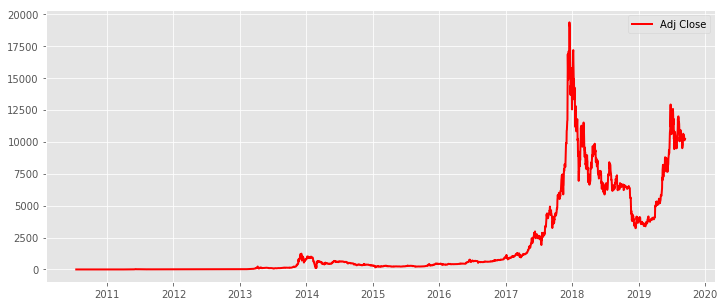

In [6]:
# df_full = pd.read_csv(f'{stock}.csv')
# # df_full.head()

# df = df_full.copy()
close = df['Adj Close']
fig = plt.figure(figsize = (12,5))
plt.plot(close, color='r', lw=2.)
# plt.plot(close, '^', markersize=10, color='m', label = 'buying signal', markevery = states_buy)
# plt.plot(close, 'v', markersize=10, color='k', label = 'selling signal', markevery = states_sell)
# plt.title('total gains %f, total investment %f%%'%(total_gains, invest))
plt.legend()
# plt.savefig('output/'+name+'.png')
plt.show()

## Code out the Rolling Mean

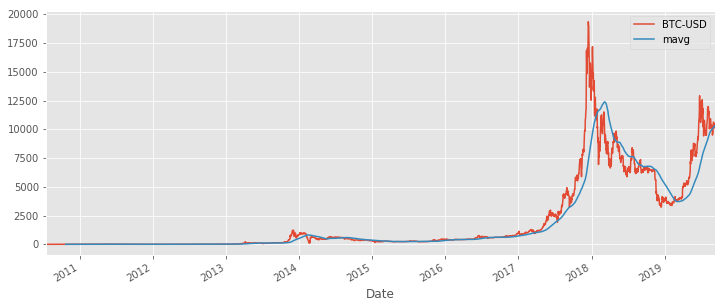

In [7]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
# mavg.tail(10)

fig = plt.figure(figsize = (12,5))
close_px.plot(label=stock)
mavg.plot(label='mavg')
_ = plt.legend()

## Predicting Stocks Price
To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-07-16,0.04951,0.04951,0.04951,0.04951,0,0.04951
2010-07-17,0.08585,0.05941,0.04951,0.08584,5,0.08584
2010-07-18,0.09307,0.07723,0.08584,0.08080,49,0.08080
2010-07-19,0.08181,0.07426,0.08080,0.07474,20,0.07474
2010-07-20,0.07921,0.06634,0.07474,0.07921,42,0.07921


In [9]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2010-07-16,0.04951,0,0.000000,0.000000
2010-07-17,0.08584,5,30.801493,73.379124
2010-07-18,0.08080,49,19.603963,-5.871394
2010-07-19,0.07474,20,10.101687,-7.499996
2010-07-20,0.07921,42,16.247947,5.980731


In [10]:
import math
import numpy as np
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(3345, 4)
Dimension of X (3311, 4)
Dimension of y (3311,)


/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [11]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

In [13]:
# from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
model_linear = LinearRegression(n_jobs=-1)
model_linear.fit(X_train, y_train)
model_linear_score = model_linear.score(X_test, y_test)
print("model_linear_score", model_linear_score)

# Ridge
model_ridge = Ridge()
model_ridge.fit(X_train, y_train)
model_ridge_score = model_ridge.score(X_test, y_test)
print("model_ridge_score", model_ridge_score)

# Lasso
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_lasso_score = model_lasso.score(X_test, y_test)
print("model_lasso_score", model_lasso_score)

# SGD
model_sgd = make_pipeline(SGDRegressor(max_iter=50, penalty=None, eta0=0.1))
model_sgd.fit(X_train, y_train)
model_sgd_score = model_sgd.score(X_test, y_test)
print("model_sgd_score", model_sgd_score)

# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)
clfpoly2_score = clfpoly2.score(X_test, y_test)
print("Quadratic Regression 2 score", clfpoly2_score)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
clfpoly3_score = clfpoly3.score(X_test, y_test)
print("Quadratic Regression 3 score", clfpoly3_score)

# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)
clfknn_score = clfknn.score(X_test, y_test)
print("KNN Regression score", clfknn_score)

model_linear_score 0.8639267659202314
model_ridge_score 0.8639222753116906
model_lasso_score 0.8639207001743818
model_sgd_score 0.8540921988698004
Quadratic Regression 2 score 0.8830839134492329
Quadratic Regression 3 score 0.8322843457877164
KNN Regression score 0.8855103406560308


/opt/rh/rh-python36/root/usr/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


## Evaluation
A simple quick and dirty way to evaluate is to use the score method in each trained model. The score method finds the mean accuracy of self.predict(X) with y of the test data set.

### This means that this time the knn regression holds the most accuracy

## Plotting the Prediction
Based on the forecast, we will visualize the plot with our existing historical data. This will help us visualize how the model fares to predict future stocks pricing.

[10253.33007812 10538.58007812  9821.43994141 10253.33007812
 11097.51513672  8793.12988281  9944.40527344  9696.45019531
  9696.45019531 10605.14990234  9821.43994141  9976.08007812
  9936.45019531 10154.01513672  9959.21533203  9696.45019531
 10538.58007812  9630.58496094  9976.08007812 10718.
  9696.45019531 11121.09521484 10551.54541016 10605.14990234
  9971.12988281 10321.01513672  9630.58496094 10122.93017578
  9558.67480469  9630.58496094  9821.43994141  9630.58496094
  9630.58496094  9558.67480469]


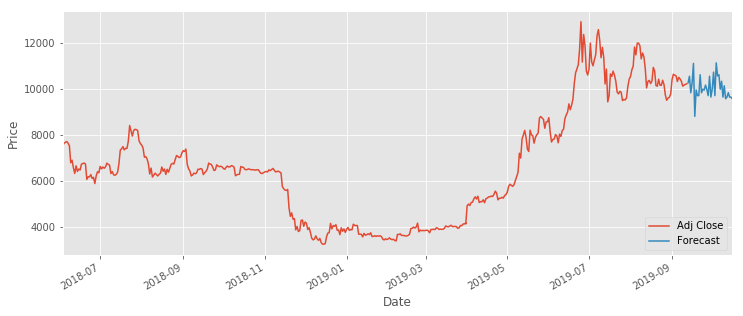

In [17]:
import datetime

dfreg_forecast = dfreg.copy()

# Printing the forecast
forecast_set = clfknn.predict(X_lately)
dfreg_forecast['Forecast'] = np.nan
print(forecast_set)
# print(forecast_set, confidence, forecast_out)

last_date = dfreg_forecast.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg_forecast.loc[next_date] = [np.nan for _ in range(len(dfreg_forecast.columns)-1)]+[i]
    
dfreg_forecast['Adj Close'].tail(500).plot()
dfreg_forecast['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig(f'{stock}-forecast.png')
plt.show()

## Agents notes

### Based on predefined threshold values
- Turtle Trading agent
- Moving Average agent
- Signal Rolling agent

### Pure reinforcement learning
- Policy Gradient agent
- Q-learning agent - Super interesting :)

### Evolutionary strategies
- Evolution Strategy agent

### Deep Reinforcement learning
- Double Q-learning agent
- Recurrent Q-learning agent
- Double Recurrent Q-learning agent
- Duel Q-learning agent
- Double Duel Q-learning agent
- Duel Recurrent Q-learning agent
- Double Duel Recurrent Q-learning agent
- Actor-critic agent
- Actor-critic Duel agent
- Actor-critic Recurrent agent
- Actor-critic Duel Recurrent agent
- Curiosity Q-learning agent
- Recurrent Curiosity Q-learning agent
- Duel Curiosity Q-learning agent
- Neuro-evolution agent
- Neuro-evolution with Novelty search agent
- ABCD strategy agent
- Deep Evolution Strategy